# Project 2
## House Prices - Advanced Regression Techniques
### By Rodrigo Fritz Hernández and José Jenaro Fernández Velázquez

To begin, we load the necessary modules:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np

Then, we load the training data.

In [2]:
train = pd.read_csv('train.csv')

We would like to take a look on what kind of information we are dealing with.
Specially, we would like to know what *non numerical information* we are given:

In [3]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Let's take a closer look at the non numerical information we are given.

In [4]:
pd.set_option('display.max_columns', 81)
train.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


There are 43 `object` type columns, along with 38 numerical columns, 3 of them `float` type.
The ```float``` columns are displayed next

In [5]:
train.select_dtypes(include='float') #funciona para float64

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


We now gather the non numerical information in a list called ```non_num_info```

In [11]:
non_num_info = []
for col in train.columns:
    if(train[col].dtype == object ):
        non_num_info.append(col)

By looking into the ```data_description.txt``` file, we realize that some columns (e.g. ```ExterQual```) evaluate quality, which can also be evaluated on a 1 to 10 scale.
This scale would go like this:

|string assigned | value | numerical scale |
|----|----|:-:|
|Ex |Excellent| 10 |
|Gd |Good| 8|
|TA |Typical/Avg| 6|
|Fa |Fair| 4|
|Po |Poor| 2|
|NA| Not available|  0|

Please notice that the ```NA``` value is only present if a house does not feature the characteristic of the column (e.g. a ```NA``` in the ```FireplaceQu``` represents that that house has no fireplace.)
We should treat the ```bsmtExposure``` differently, since its possible values are:

|string assigned | value | numerical scale |
|----|----|:-:|
|Gd |Good| 10|
|Av |Average| 7.5|
|Mn |Minimum| 5|
|No |No exposure| 2.5|
|NA| No basement| 0|

At last, we can see in the ```data_description``` file that the ```CentralAir```column has Y/N values,
which makes it really easy to convert to 0s and 1s

We will find these columns using the next piece of code, in which we also define the function to transform the data into numbers.

In [14]:
# used to detect NA values.
#for i in range(1460):
    #if train.BsmtExposure[i] != train.BsmtExposure[i]:
        #print(i)

In [12]:
train.loc[train.BsmtExposure.isna(), :].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [15]:
#train.BsmtExposure[16:19]

16     No
17    NaN
18     No
Name: BsmtExposure, dtype: object

In [68]:
scalable= []
for col in non_num_info:
    if train[col][1] in ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'GLQ', 'ALQ', 'BLQ', 'LwQ', 'Rec', 'Unf'] or col == 'CentralAir':
        scalable.append(col)
print(scalable)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']


In [216]:
train1 = train.copy()

In [217]:
def to_numbers(value, col):
    
    if col == 'CentralAir':
        if value == 'Y':
            return(1)
        else:
            return(0)
        
    elif col == 'BsmtExposure':
        if   value == 'Gd':
            return (8)
        elif value == 'Av':
            return (6)
        elif value == 'Mn':
            return (4)
        elif value == 'No':
            return (2)
        else:
            return (0)
        
    else:
        if   value == 'Ex':
            return(10)
        elif value == 'Gd':
            return(8)
        elif value == 'TA':
            return(6)
        elif value == 'Fa':
            return(4)
        elif value == 'Po':
            return(2)
        elif value == 'GLQ': #Good Living Quarters
            return (10)
        elif value == 'ALQ': #Avg LQ
            return (8)
        elif value == 'Rec': #Avg recreation room
            return (8)
        elif value == 'BLQ': #Below avg
            return (6)
        elif value == 'LwQ': #Low Quality
            return (4)
        elif value == 'Unf': #Unfinished
            return (2)
        else:
            return(0)

for i in range(1460):
    for col in scalable:
        train1[col][i] = to_numbers(train1[col][i], col)

<ipython-input-217-6d2791683022>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1[col][i] = to_numbers(train1[col][i], col)


In [13]:
#train1.BsmtExposure.value_counts()

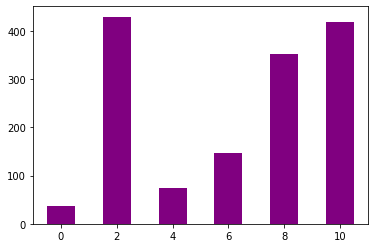

In [123]:
train1.BsmtFinType1.value_counts(sort=False).plot.bar(color='purple')
plt.xticks(rotation=0);

After what we did, we should convert the data type of each modified column:

In [218]:
for col in scalable:
    #print(col)
    train1[col] = train1[col].astype('int64')

The next table shows which columns still have non numerical information:

In [125]:
train1.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Unf,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,GasA,SBrkr,Min1,Attchd,Unf,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,GasA,SBrkr,Typ,Attchd,RFn,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,GasA,FuseA,Typ,Attchd,Unf,Y,NaN,NaN,NaN,WD,Normal


In [207]:
#train1[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']]
# Es más corto escribir train1[scalable]
train1[scalable]

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,8,6,8,6,2,10,2,10,1,8,None,6,6
1,6,6,8,6,8,8,2,10,1,6,6,6,6
2,8,6,8,6,4,10,2,10,1,8,6,6,6
3,6,6,6,8,2,8,2,8,1,8,8,6,6
4,8,6,8,6,6,10,2,10,1,8,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,6,8,6,2,2,2,10,1,6,6,6,6
1456,6,6,8,6,2,8,8,6,1,6,6,6,6
1457,10,8,6,8,2,10,2,10,1,8,8,6,6
1458,6,6,6,6,4,10,8,8,1,8,None,6,6


# Neighborhood

In [264]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

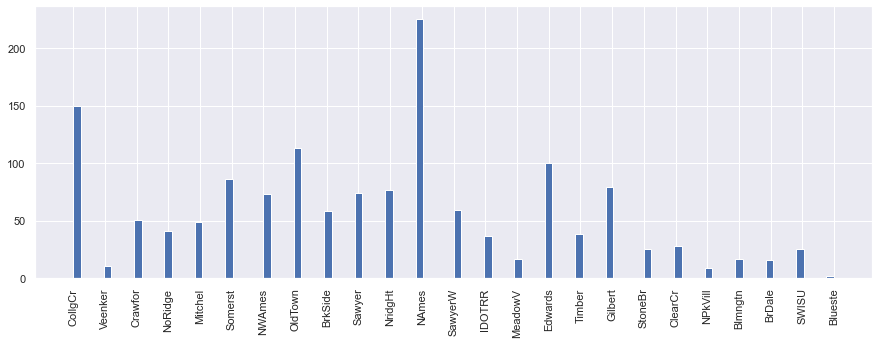

In [268]:
with sbn.axes_style('darkgrid'):
    plt.figure(figsize=(15,5))
    plt.hist(train.Neighborhood, bins=100)
    plt.xticks(rotation=90);

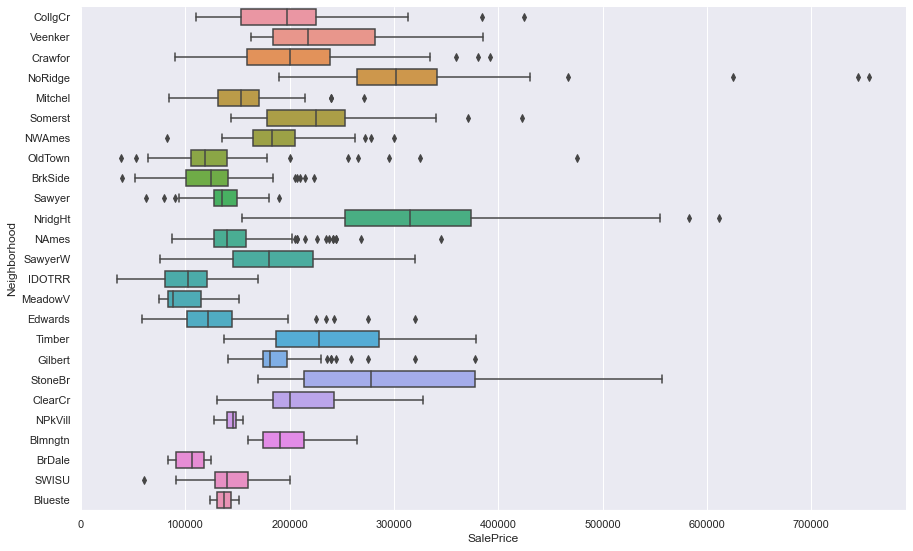

In [258]:
with sbn.axes_style('darkgrid'):
    g=sbn.catplot(x=(train.SalePrice), y='Neighborhood', kind="box", data=train)
    g.fig.set_size_inches(15,8)

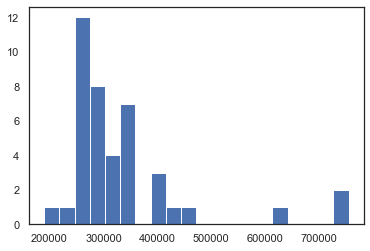

In [287]:
plt.hist(np.sort(train.SalePrice[train.Neighborhood=='NoRidge']),bins=20);

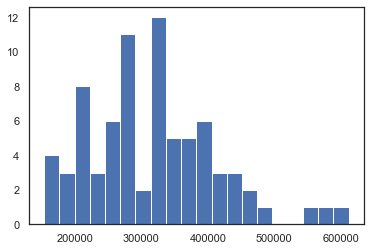

In [289]:
plt.hist(np.sort(train.SalePrice[train.Neighborhood=='NridgHt']),bins=20);

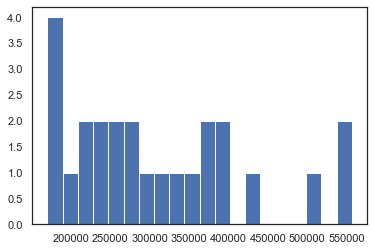

In [290]:
plt.hist(np.sort(train.SalePrice[train.Neighborhood=='StoneBr']),bins=20);

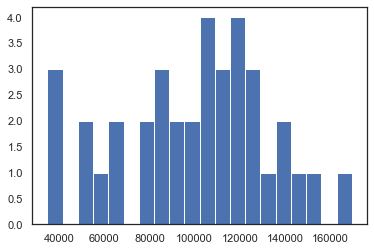

In [291]:
plt.hist(np.sort(train.SalePrice[train.Neighborhood=='IDOTRR']),bins=20);

# Basement

In [349]:
Bsmt = train1[['SalePrice', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2',
               'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF']]
Bsmt

,SalePrice,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF
0,208500,856,8,6,2,706,0,10,2,1,0,150
1,181500,1262,8,6,8,978,0,8,2,0,1,284
2,223500,920,8,6,4,486,0,10,2,1,0,434
3,140000,756,6,8,2,216,0,8,2,1,0,540
4,250000,1145,8,6,6,655,0,10,2,1,0,490
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,953,8,6,2,0,0,2,2,0,0,953
1456,210000,1542,8,6,2,790,163,8,8,1,0,589
1457,266500,1152,6,8,2,275,0,10,2,0,0,877
1458,142125,1078,6,6,4,49,1029,10,8,1,0,0


In [350]:
Bsmt.corr().style.background_gradient(cmap='coolwarm')

,SalePrice,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF
SalePrice,1.000000,0.613581,0.585207,0.212607,0.374696,0.386420,-0.011378,0.287378,-0.010175,0.227122,-0.016844,0.214479
TotalBsmtSF,0.613581,1.000000,0.564299,0.372530,0.383291,0.522396,0.104810,0.335802,0.119027,0.307351,-0.000315,0.415360
BsmtQual,0.585207,0.564299,1.000000,0.633713,0.399339,0.304607,-0.030991,0.367106,0.077238,0.223495,-0.013362,0.257158
BsmtCond,0.212607,0.372530,0.633713,1.000000,0.255687,0.165801,0.081904,0.313538,0.248279,0.156465,0.064811,0.168821
BsmtExposure,0.374696,0.383291,0.399339,0.255687,1.000000,0.369115,0.094658,0.333735,0.115625,0.338672,0.078180,-0.035013
BsmtFinSF1,0.386420,0.522396,0.304607,0.165801,0.369115,1.000000,-0.050117,0.699017,-0.005582,0.649212,0.067418,-0.495251
BsmtFinSF2,-0.011378,0.104810,-0.030991,0.081904,0.094658,-0.050117,1.000000,0.043921,0.792466,0.158678,0.070948,-0.209294
BsmtFinType1,0.287378,0.335802,0.367106,0.313538,0.333735,0.699017,0.043921,1.000000,0.124311,0.571576,0.074520,-0.404166
BsmtFinType2,-0.010175,0.119027,0.077238,0.248279,0.115625,-0.005582,0.792466,0.124311,1.000000,0.160937,0.123720,-0.165380
BsmtFullBath,0.227122,0.307351,0.223495,0.156465,0.338672,0.649212,0.158678,0.571576,0.160937,1.000000,-0.147871,-0.422900


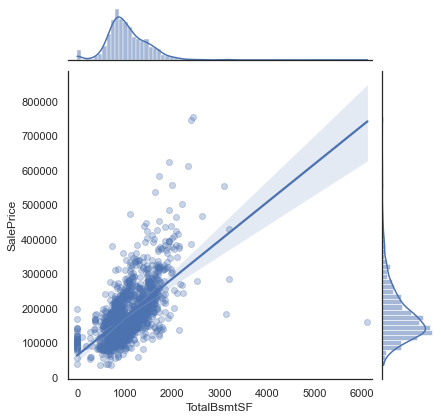

In [348]:
g = sbn.jointplot(x=train1.TotalBsmtSF, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-200,6200))

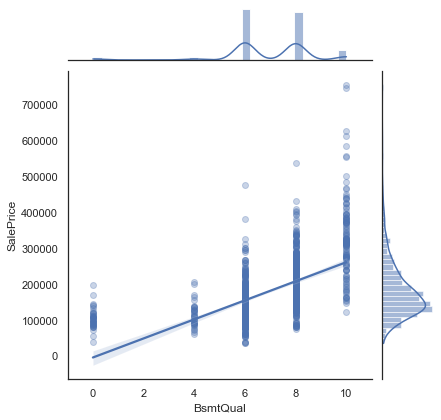

In [347]:
g = sbn.jointplot(x=train1.BsmtQual, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,11))
g.ax_joint.set_xticks(np.arange(0,11,2));

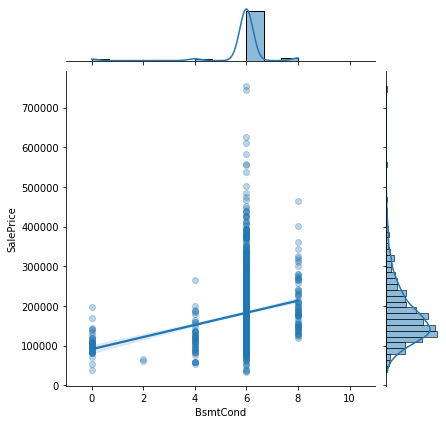

In [87]:
g = sbn.jointplot(x=train1.BsmtCond, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,11))
g.ax_joint.set_xticks(np.arange(0,11,2));

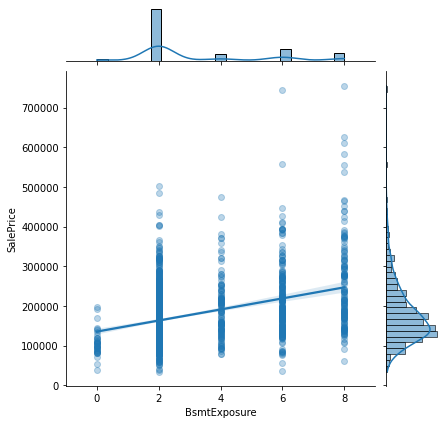

In [81]:
g = sbn.jointplot(x=train1.BsmtExposure, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,9))
g.ax_joint.set_xticks(np.arange(0,9,2));

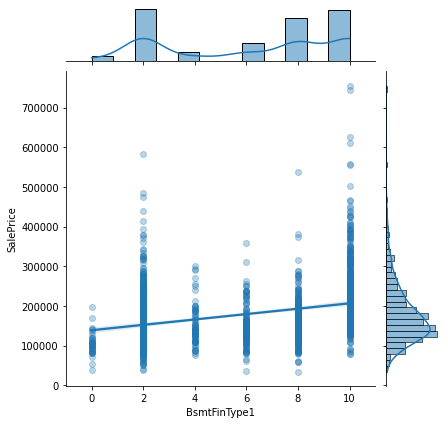

In [77]:
g = sbn.jointplot(x=train1.BsmtFinType1, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,11))
g.ax_joint.set_xticks(np.arange(0,11,2));

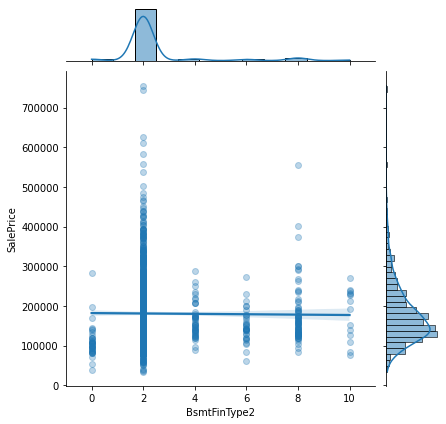

In [76]:
g = sbn.jointplot(x=train1.BsmtFinType2, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-1,11))
g.ax_joint.set_xticks(np.arange(0,11,2));

In [175]:
train1.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
117        2
391        2
        ... 
215        1
211        1
210        1
208        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64

### Let's replace the zeros with NaNs in order to get more accurate correlations, which only happens with certain parameters

In [127]:
train2 = train1.copy()

In [130]:
train2.replace(0, np.NaN, inplace=True) # train2.BsmtFinSF1[train2.BsmtFinSF1=='0'] = np.NaN

In [138]:
train2.BsmtFinSF1.max()

5644.0

In [178]:
Bsmt[['SalePrice', 'BsmtFinSF1']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF2
SalePrice,1.000000,-0.011378
BsmtFinSF2,-0.011378,1.000000


In [177]:
train2[['SalePrice', 'BsmtFinSF1']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF2
SalePrice,1.000000,0.198956
BsmtFinSF2,0.198956,1.000000


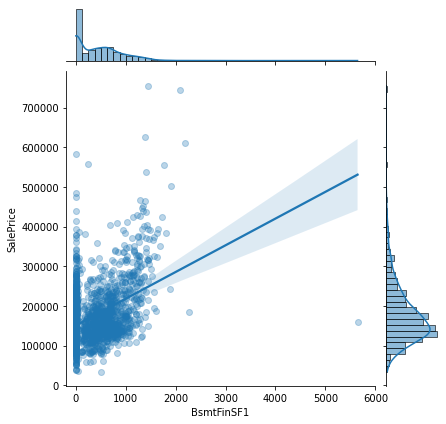

In [179]:
g = sbn.jointplot(x=train1.BsmtFinSF1, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-200,6000))

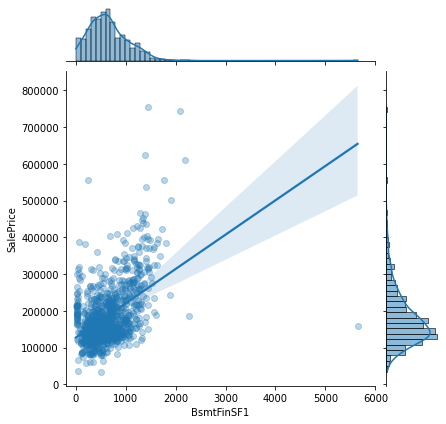

In [152]:
g = sbn.jointplot(x=train2.BsmtFinSF1, y=train2.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-200,6000))

In [187]:
Bsmt[['SalePrice', 'BsmtFinSF2']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF2
SalePrice,1.000000,-0.011378
BsmtFinSF2,-0.011378,1.000000


In [188]:
train2[['SalePrice', 'BsmtFinSF2']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF2
SalePrice,1.000000,0.198956
BsmtFinSF2,0.198956,1.000000


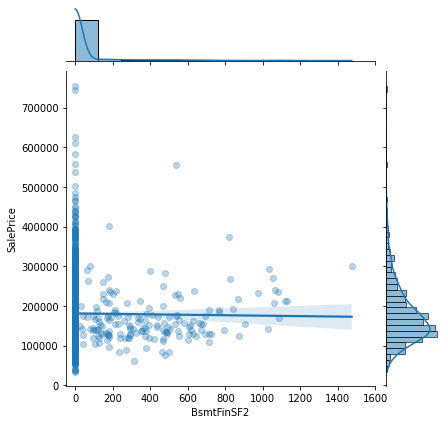

In [185]:
g = sbn.jointplot(x=train1.BsmtFinSF2, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-50,1600))

In [195]:
len(train1.BsmtFinSF2)

1460

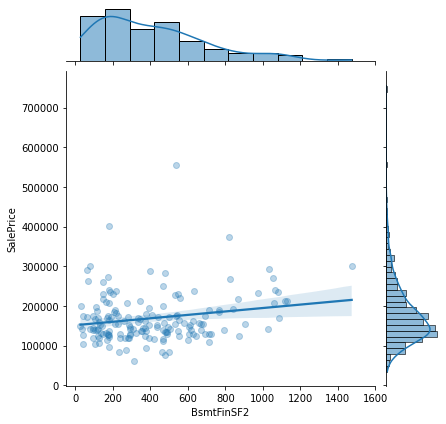

In [186]:
g = sbn.jointplot(x=train2.BsmtFinSF2, y=train2.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-50,1600))

<ipython-input-20-0b1024f32ef2>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(col)


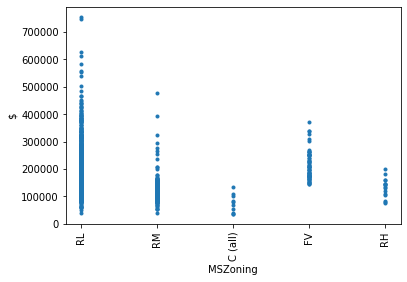

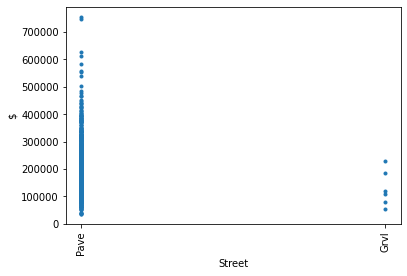

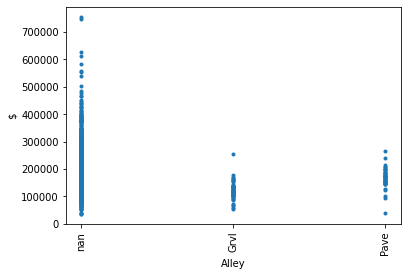

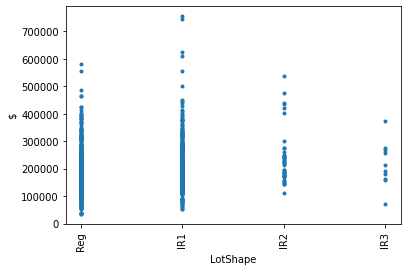

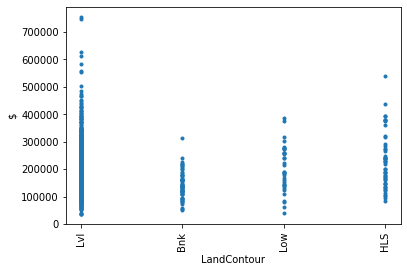

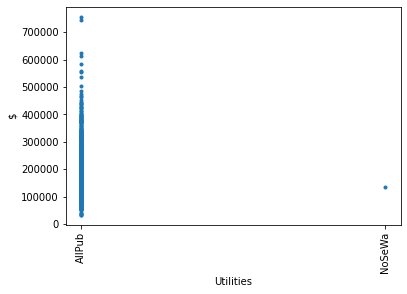

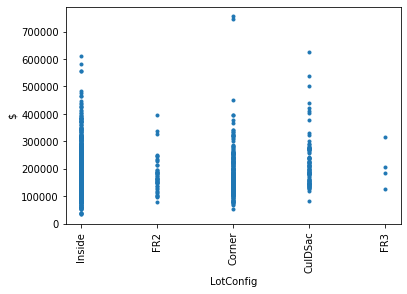

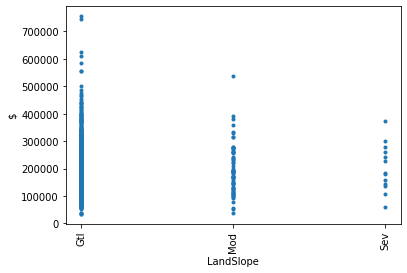

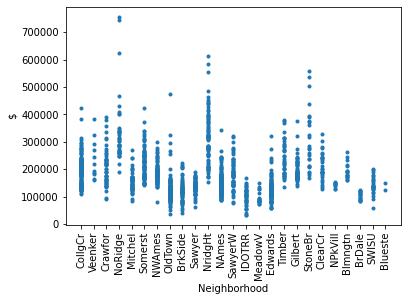

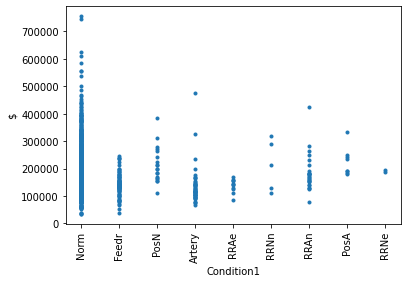

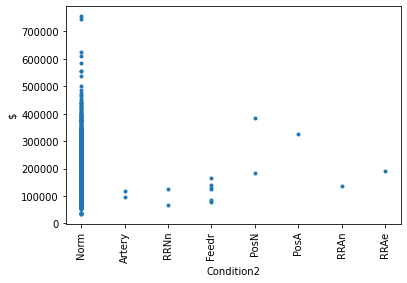

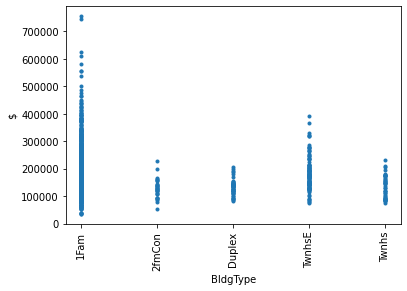

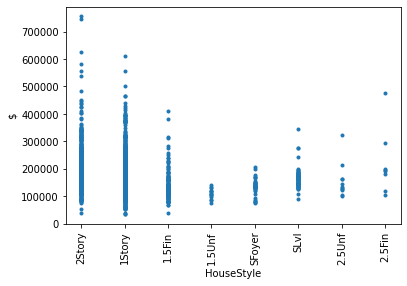

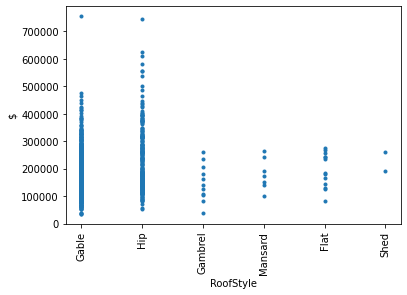

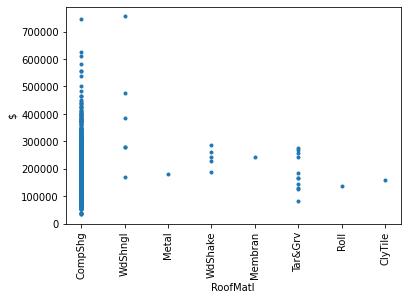

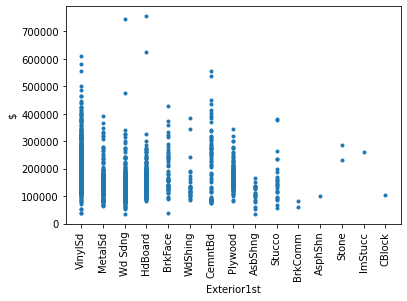

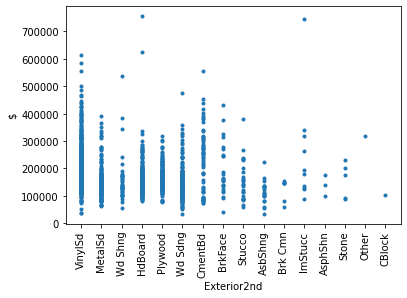

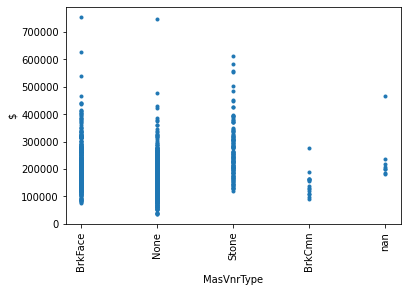

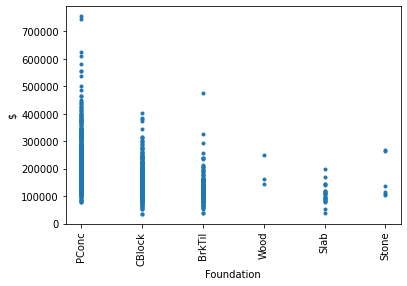

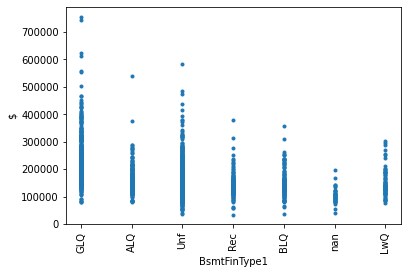

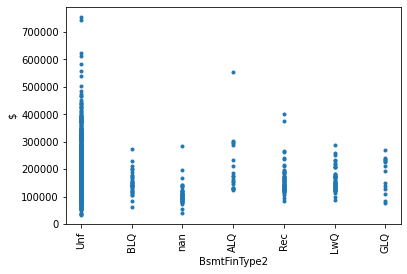

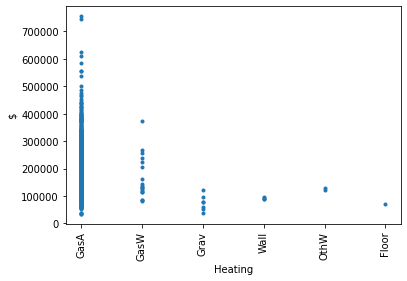

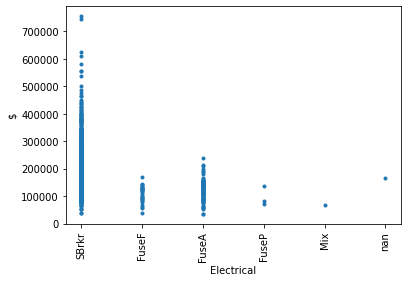

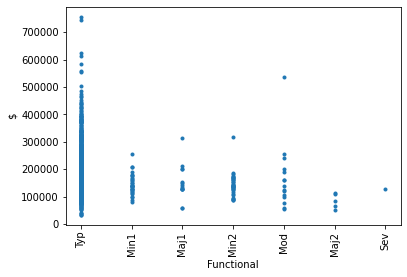

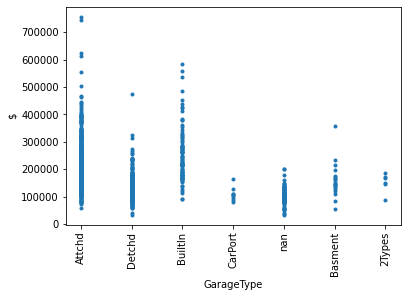

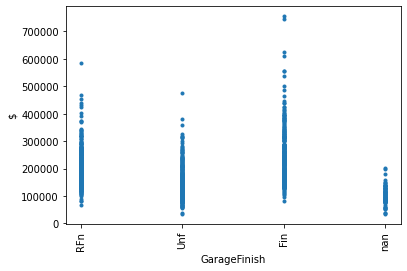

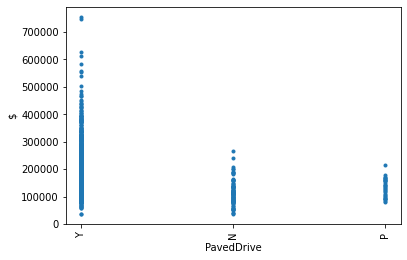

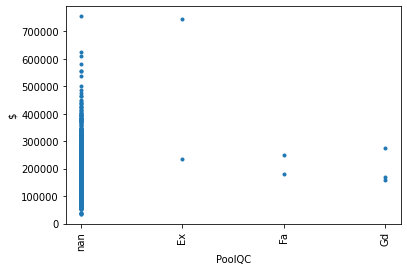

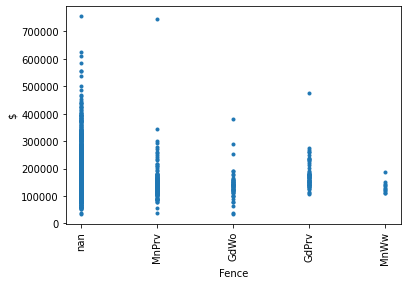

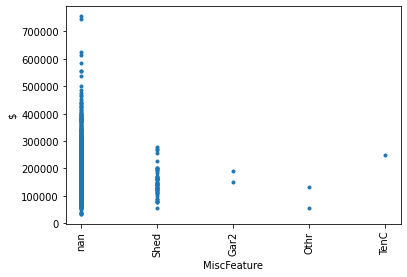

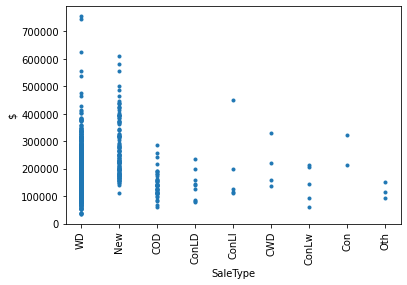

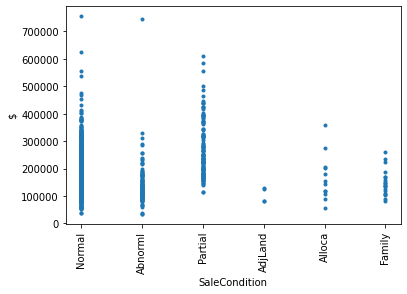

In [20]:
# We remove the columns that have been turned into numbers
for col in scalable:
    non_num_info.remove(col)
for col in non_num_info:
    plt.figure(col)
    plt.plot(train1[col].astype('str'), train1.SalePrice, '.')
    plt.show
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('$')

Since we have 81 variables, we would like to see which ones are more related to our objective variable: *SalePrice*.
For this, we run the next cell:

In [292]:
train1.corr().style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,0.005039,0.029860,-0.028425,0.010085,0.017320,-0.018879,-0.005024,-0.005525,-0.005968,-0.007940,-0.015415,-0.015001,0.009821,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.014973,0.027239,-0.019772,0.001760,0.000072,0.016570,0.017634,0.013912,0.008607,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,0.016178,-0.064686,0.051122,-0.015839,0.051150,0.011034,-0.069836,-0.033576,-0.065649,-0.140759,-0.238518,-0.019458,-0.101774,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,-0.045569,-0.039201,0.085072,-0.040110,-0.098672,-0.072946,-0.089846,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.178993,-0.017264,0.152570,0.051513,0.181279,0.089194,0.233633,0.028390,0.049900,0.132644,0.392075,0.098509,0.071659,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.181839,0.352096,0.266639,0.245531,0.070250,0.285691,0.344997,0.113956,0.109442,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.055570,0.014732,0.072336,0.031349,0.228830,0.064578,0.214103,0.104694,0.111170,-0.002618,0.260833,0.003581,0.049755,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,0.271364,0.185332,-0.024947,0.154871,0.180403,0.079313,0.076097,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.726278,0.013953,0.629379,0.268759,0.296517,0.213561,0.239666,-0.052123,-0.059119,0.308159,0.537808,0.457083,0.272038,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.673331,0.427452,0.396765,0.490788,0.547766,0.600671,0.562022,0.292399,0.286955,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.138942,0.389163,-0.164996,0.132361,-0.056732,-0.008357,-0.046231,0.099913,0.040229,-0.136841,-0.171098,-0.014105,0.118969,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.026707,-0.057583,-0.023820,-0.056899,-0.324297,-0.185758,-0.151521,0.019060,0.016706,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.598160,-0.103925,0.602797,0.183115,0.289623,0.311596,0.249503,-0.047768,-0.049107,0.149040,0.391452,0.448855,0.381831,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.530165,0.095589,0.147716,0.224545,0.825667,0.537850,0.478954,0.287054,0.291096,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.0137

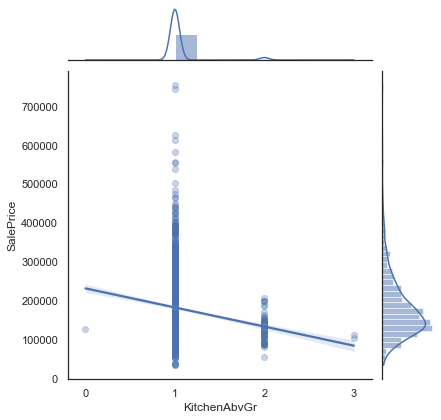

In [316]:
g = sbn.jointplot(x=train1.KitchenAbvGr, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-0.2,3.2))
g.ax_joint.set_xticks(range(4));

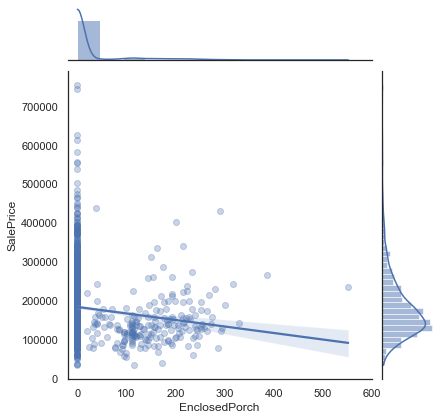

In [319]:
g = sbn.jointplot(x=train1.EnclosedPorch, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3), xlim=(-20,600))

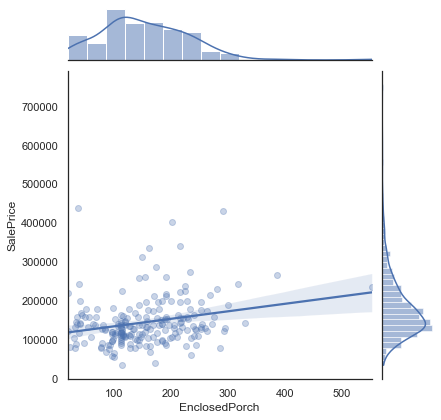

In [313]:
g = sbn.jointplot(x=train2.EnclosedPorch, y=train2.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3))

In [298]:
train.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

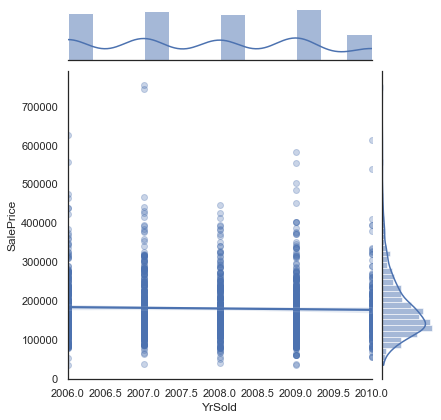

In [299]:
g = sbn.jointplot(x=train1.YrSold, y=train1.SalePrice, kind = 'reg', scatter_kws=dict(alpha=0.3))

# Multilineal Regression

In [379]:
y = train.SalePrice
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [23]:
x = train1.select_dtypes(exclude='object')

In [24]:
x.mean()

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
ExterQual             6.791781
ExterCond             6.167123
BsmtQual              6.978082
BsmtCond              5.869863
BsmtExposure          3.673288
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
HeatingQC             8.290411
CentralAir            0.934932
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
KitchenQual           7.023288
TotRmsAbvGrd          6.517808
Fireplac

In [25]:
x_std = (x - x.mean())/x.std()

In [377]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state
from sklearn.metrics import (mean_squared_error,mean_absolute_error,
                             r2_score,explained_variance_score)
from sklearn import model_selection

In [27]:
x.dropna(inplace=True)

<ipython-input-27-fe0c9ab1f160>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.dropna(inplace=True)


In [29]:
x1 = train1.copy()
x1 = x1.dropna(axis = 1)
x1 = x1.drop("SalePrice", axis = 1)

In [53]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [359]:
x1 = train1.copy()
x1 = x1.dropna(axis = 1)
x1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,8,6,PConc,8,6,2,10,706,2,0,150,856,GasA,10,1,856,854,0,1710,1,0,2,1,3,1,8,8,Typ,0,0,2,548,6,6,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,6,6,CBlock,8,6,8,8,978,2,0,284,1262,GasA,10,1,1262,0,0,1262,0,1,2,0,3,1,6,6,Typ,1,6,2,460,6,6,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,8,6,PConc,8,6,4,10,486,2,0,434,920,GasA,10,1,920,866,0,1786,1,0,2,1,3,1,8,6,Typ,1,6,2,608,6,6,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,6,6,BrkTil,6,8,2,8,216,2,0,540,756,GasA,8,1,961,756,0,1717,1,0,1,0,3,1,8,7,Typ,1,8,3,642,6,6,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,8,6,PConc,8,6,6,10,655,2,0,490,1145,GasA,10,1,1145,1053,0,2198,1,0,2,1,4,1,8,9,Typ,1,6,3,836,6,6,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,6,6,PConc,8,6,2,2,0,2,0,953,953,GasA,10,1,953,694,0,1647,0,0,2,1,3,1,6,7,Typ,1,6,2,460,6,6,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,6,6,CBlock,8,6,2,8,790,8,163,589,1542,GasA,6,1,2073,0,0,2073,1,0,2,0,3,1,6,7,Min1,2,6,2,500,6,6,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,10,8,Stone,6,8,2,10,275,2,0,877,1152,GasA,10,1,1188,1152,0,2340,0,0,2,0,4,1,8,9,Typ,2,8,1,252,6,6,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,6,6,CBlock,6,6,4,10,49,8,1029,0,1078,GasA,8,1,1078,0,0,1078,1,0,1,0,2,1,8,5,Typ,0,0,1,240,6,6,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [360]:
x1 = x1.select_dtypes(include = 'number')

In [361]:
x1

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,8,6,8,6,2,10,706,2,0,150,856,10,1,856,854,0,1710,1,0,2,1,3,1,8,8,0,0,2,548,6,6,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,6,6,8,6,8,8,978,2,0,284,1262,10,1,1262,0,0,1262,0,1,2,0,3,1,6,6,1,6,2,460,6,6,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,8,6,8,6,4,10,486,2,0,434,920,10,1,920,866,0,1786,1,0,2,1,3,1,8,6,1,6,2,608,6,6,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,6,6,6,8,2,8,216,2,0,540,756,8,1,961,756,0,1717,1,0,1,0,3,1,8,7,1,8,3,642,6,6,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,8,6,8,6,6,10,655,2,0,490,1145,10,1,1145,1053,0,2198,1,0,2,1,4,1,8,9,1,6,3,836,6,6,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,6,6,8,6,2,2,0,2,0,953,953,10,1,953,694,0,1647,0,0,2,1,3,1,6,7,1,6,2,460,6,6,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,6,6,8,6,2,8,790,8,163,589,1542,6,1,2073,0,0,2073,1,0,2,0,3,1,6,7,2,6,2,500,6,6,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,10,8,6,8,2,10,275,2,0,877,1152,10,1,1188,1152,0,2340,0,0,2,0,4,1,8,9,2,8,1,252,6,6,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,6,6,6,6,4,10,49,8,1029,0,1078,8,1,1078,0,0,1078,1,0,1,0,2,1,8,5,0,0,1,240,6,6,366,0,112,0,0,0,0,4,2010,142125


In [32]:
ls1 = LinearRegression()
ls1.fit(x1, y)
ls1.coef_

array([-2.90207692e+00, -1.90928504e+02,  3.32641230e-01,  1.27026098e+04,
        6.29103733e+03,  2.24072605e+02, -1.27774653e+02,  6.84633641e+03,
       -1.60501220e+03,  4.19465171e+03, -4.24969343e+03,  2.26473212e+03,
        8.82014011e+00, -3.65426639e-01, -2.82550850e+00,  5.62920498e+00,
        6.07223775e+02, -2.37294345e+03,  2.04193768e+01,  1.81039941e+01,
       -1.08456616e+01,  2.76777094e+01,  5.55658732e+03,  9.20732160e+02,
        3.56634666e+03,  2.07745220e+03, -6.09112667e+03, -9.78008405e+03,
        4.76106717e+03,  3.84747176e+03,  1.54463201e+03,  6.83693374e+02,
        1.17046085e+04,  8.84148975e+00,  1.75057358e+03, -4.92989100e+03,
        1.88537447e+01, -1.79088382e+01,  5.68077184e-01,  2.20208444e+01,
        5.25624811e+01, -2.75776387e+01,  8.15389767e-02, -1.14362292e+02,
       -5.70413514e+02])

In [33]:
x1.dot(ls1.coef_)

0      -625022.109566
1      -636397.395400
2      -618355.634621
3      -667475.391477
4      -556418.250990
            ...      
1455   -680736.829836
1456   -625666.313110
1457   -617961.445683
1458   -719545.836294
1459   -691680.868216
Length: 1460, dtype: float64

In [ ]:
for col in 

In [325]:
train1.corr()[train1.corr() > 0.5].style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MSSubClass,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
LotFrontage,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
LotArea,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
OverallQual,nan,nan,nan,nan,1.000000,nan,0.572323,0.550684,nan,0.726278,nan,0.629379,nan,nan,nan,nan,nan,nan,nan,0.537808,nan,nan,nan,nan,nan,0.593007,nan,nan,0.550600,nan,nan,nan,0.673331,nan,nan,nan,0.547766,0.600671,0.562022,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.790982
OverallCond,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
YearBuilt,nan,nan,nan,nan,0.572323,nan,1.000000,0.592855,nan,0.598160,nan,0.602797,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.530165,nan,nan,nan,0.825667,0.537850,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.522897
YearRemodAdd,nan,nan,nan,nan,0.550684,nan,0.592855,1.000000,nan,0.587318,nan,0.515013,nan,nan,nan,nan,nan,nan,nan,nan,0.550017,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.625316,nan,nan,nan,0.642277,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.507101
MasVnrArea,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ExterQual,nan,nan,nan,nan,0.726278,nan,0.598160,0.587318,nan,1.000000,nan,0.565558,nan,nan,nan,nan,nan,nan,nan,nan,0.520027,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.716122,nan,nan,nan,0.583296,0.526390,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.682639


In [187]:
Bsmt[['SalePrice', 'BsmtFinSF2']].corr().style.background_gradient(cmap='coolwarm')

,SalePrice,BsmtFinSF2
SalePrice,1.000000,-0.011378
BsmtFinSF2,-0.011378,1.000000


In [353]:
train[['SalePrice', 'BsmtFinSF2']].corr() > 0.5

,SalePrice,BsmtFinSF2
SalePrice,True,False
BsmtFinSF2,False,True


In [372]:
for col in x1:
    print( x1.corr()[['SalePrice', col]] > 0.5)

               SalePrice     Id
Id                 False   True
MSSubClass         False  False
LotArea            False  False
OverallQual         True  False
OverallCond        False  False
YearBuilt           True  False
YearRemodAdd        True  False
ExterQual           True  False
ExterCond          False  False
BsmtQual            True  False
BsmtCond           False  False
BsmtExposure       False  False
BsmtFinType1       False  False
BsmtFinSF1         False  False
BsmtFinType2       False  False
BsmtFinSF2         False  False
BsmtUnfSF          False  False
TotalBsmtSF         True  False
HeatingQC          False  False
CentralAir         False  False
1stFlrSF            True  False
2ndFlrSF           False  False
LowQualFinSF       False  False
GrLivArea           True  False
BsmtFullBath       False  False
BsmtHalfBath       False  False
FullBath            True  False
HalfBath           False  False
BedroomAbvGr       False  False
KitchenAbvGr       False  False
KitchenQ

In [68]:
big_corr = []
for col in train1:
    if train1[col][1] in ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'GLQ', 'ALQ', 'BLQ', 'LwQ', 'Rec', 'Unf'] or col == 'CentralAir':
        scalable.append(col)
print(scalable)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']


In [415]:
X = train1[['OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'TotRmsAbvGrd', 'FireplaceQu']]

In [416]:
X

,OverallQual,GrLivArea,ExterQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,TotRmsAbvGrd,FireplaceQu
0,7,1710,8,2,548,856,856,8,8,0
1,6,1262,6,2,460,1262,1262,8,6,6
2,7,1786,8,2,608,920,920,8,6,6
3,7,1717,6,3,642,756,961,6,7,8
4,8,2198,8,3,836,1145,1145,8,9,6
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,6,2,460,953,953,8,7,6
1456,6,2073,6,2,500,1542,2073,8,7,6
1457,7,2340,10,1,252,1152,1188,6,9,8
1458,5,1078,6,1,240,1078,1078,6,5,0


In [375]:
X_std = (X - X.mean())/X.std()

In [419]:
ls = LinearRegression()
ls.fit(X,y)

LinearRegression()

In [381]:
ls_std = LinearRegression()
ls_std.fit(X_std,y)

LinearRegression()

In [420]:
ls.coef_

array([1.47818477e+04, 4.12585436e+01, 1.06631146e+04, 8.88895702e+03,
       2.28782417e+01, 6.03010717e+00, 2.32035476e+01, 5.04479383e+03,
       6.22170512e+01, 1.46261130e+03])

In [421]:
X.dot(ls.coef_)

0       355525.246964
1       319440.154660
2       370555.778366
3       348909.786674
4       423205.565689
            ...      
1455    326353.711660
1456    374384.687351
1457    398345.451421
1458    258838.099711
1459    293597.774062
Length: 1460, dtype: float64

In [489]:
X.dot(ls.coef_).mean()

325936.8611822796

### These are the sale prices obtained through multilinear regression of the most correlated parameters with the price

In [384]:
train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [424]:
ans = abs(X.dot(ls.coef_) - train.SalePrice) / train.SalePrice
ans

0       0.705157
1       0.760001
2       0.657968
3       1.492213
4       0.692822
          ...   
1455    0.864878
1456    0.782784
1457    0.494730
1458    0.821200
1459    0.990493
Length: 1460, dtype: float64

In [510]:
ans = abs(X.dot(ls.coef_) - train.SalePrice) / train.SalePrice
ans

0       0.705157
1       0.760001
2       0.657968
3       1.492213
4       0.692822
          ...   
1455    0.864878
1456    0.782784
1457    0.494730
1458    0.821200
1459    0.990493
Length: 1460, dtype: float64

In [513]:
np.mean(ans)

0.962889303231815

### 96.3% confidence

In [429]:
ls.intercept_

-145015.66529186864

In [476]:
lrans = LinearRegression().fit(np.array(ans).reshape(-1,1), np.ones(len(ans)))

In [477]:
lrans.coef_, lrans.intercept_

(array([0.]), 1.0)

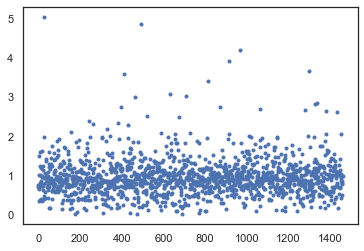

In [478]:
plt.plot(ans, '.')
plt.plot(lrans.coef_ + lrans.intercept_);

In [385]:
ls_std.coef_

array([20443.24438365, 12247.23666651,  8843.30513452, 21680.55530058,
        6642.85100858,  4891.47884895,  2645.44012356,  8970.20698796,
         101.12717765,  5297.21796151])

In [386]:
X_std.dot(ls_std.coef_)

0       29588.385781
1       -6496.706523
2       44618.917184
3       22972.925492
4       97268.704507
            ...     
1455      416.850477
1456    48447.826169
1457    72408.590239
1458   -67098.761471
1459   -32339.087120
Length: 1460, dtype: float64

In [493]:
y_hat_std = ls_std.predict(X_std)
y_hat_std

array([210509.58167173, 174424.48936769, 225540.11307452, ...,
       253329.78612941, 113822.43441914, 148582.10876992])

In [494]:
y_hat = ls.predict(X)
y_hat

array([210509.58167173, 174424.48936769, 225540.11307452, ...,
       253329.78612941, 113822.43441914, 148582.10876992])

In [497]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

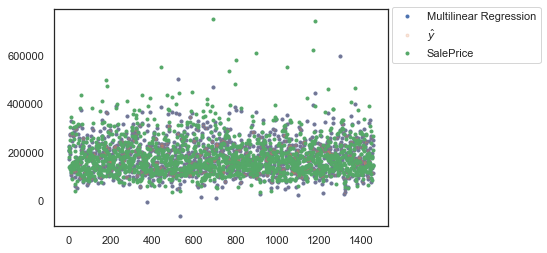

In [538]:
plt.plot(X.dot(ls.coef_) + ls.intercept_, '.', label='Multilinear Regression')
plt.plot(y_hat, '.', alpha=0.2, label='$\hat{y}$')
plt.plot(train.SalePrice, '.', label='SalePrice')
plt.legend(loc=(1.01, 0.75));

In [486]:
y_hat_std.mean()

180921.19589041095

In [390]:
y_hat.mean()

180921.19589041095

In [391]:
y.mean()

180921.19589041095

Sale Price average: $180,921 USD

In [392]:
print('RMSE: % 1.f' %np.sqrt(mean_squared_error(y,y_hat_std)))
print('r"2: % 1.3f' % r2_score(y,y_hat_std))

RMSE:  36953
r"2:  0.783


In [487]:
print('RMSE: % 1.f' %np.sqrt(mean_squared_error(y,y_hat)))
print('r"2: % 1.3f' % r2_score(y,y_hat))

RMSE:  36953
r"2:  0.783


In [393]:
np.sqrt(mean_squared_error(y,y_hat_std)) / y_hat.mean()

0.20425135827060178

In [482]:
print(ls_std.intercept_)
coefs = pd.DataFrame(index = X.columns, data = ls_std.coef_,columns=['coeficientes'])
coefs

180921.19589041095


,coeficientes
OverallQual,20443.244384
GrLivArea,12247.236667
ExterQual,8843.305135
GarageCars,21680.555301
GarageArea,6642.851009
TotalBsmtSF,4891.478849
1stFlrSF,2645.440124
BsmtQual,8970.206988
TotRmsAbvGrd,101.127178
FireplaceQu,5297.217962


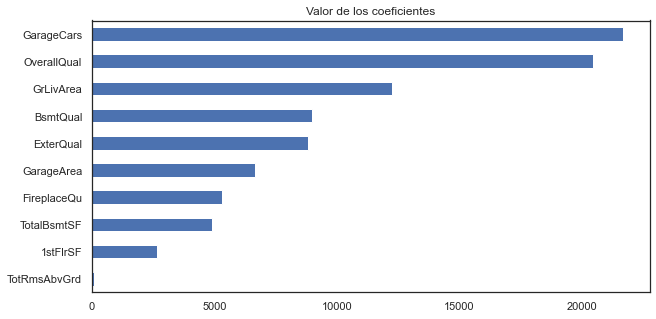

In [483]:
coefs.sort_values('coeficientes').plot.barh(legend=False, title='Valor de los coeficientes', figsize=(10,5));

In [417]:
X1 = X.copy()
X1['SalePrice'] = train.SalePrice

In [481]:
X1.corr().style.background_gradient(cmap='coolwarm')

,OverallQual,GrLivArea,ExterQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,TotRmsAbvGrd,FireplaceQu,SalePrice
OverallQual,1.000000,0.593007,0.726278,0.600671,0.562022,0.537808,0.476224,0.629379,0.427452,0.490788,0.790982
GrLivArea,0.593007,1.000000,0.435986,0.467247,0.468997,0.454868,0.566024,0.327956,0.825489,0.469947,0.708624
ExterQual,0.726278,0.435986,1.000000,0.526390,0.495778,0.470580,0.397835,0.565558,0.297903,0.361798,0.682639
GarageCars,0.600671,0.467247,0.526390,1.000000,0.882475,0.434585,0.439317,0.449194,0.362289,0.370034,0.640409
GarageArea,0.562022,0.468997,0.495778,0.882475,1.000000,0.486665,0.489782,0.406109,0.337822,0.327973,0.623431
TotalBsmtSF,0.537808,0.454868,0.470580,0.434585,0.486665,1.000000,0.819530,0.564299,0.285573,0.347615,0.613581
1stFlrSF,0.476224,0.566024,0.397835,0.439317,0.489782,0.819530,1.000000,0.293598,0.409516,0.407887,0.605852
BsmtQual,0.629379,0.327956,0.565558,0.449194,0.406109,0.564299,0.293598,1.000000,0.185846,0.307337,0.585207
TotRmsAbvGrd,0.427452,0.825489,0.297903,0.362289,0.337822,0.285573,0.409516,0.185846,1.000000,0.355589,0.533723
FireplaceQu,0.490788,0.469947,0.361798,0.370034,0.327973,0.347615,0.407887,0.307337,0.355589,1.000000,0.520438


In [396]:
%whos

Variable                   Type                Data/Info
--------------------------------------------------------
Bsmt                       DataFrame                 SalePrice  TotalBsm<...>n[1460 rows x 12 columns]
LinearRegression           ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
X                          DataFrame                 OverallQual  ExterQ<...>n[1460 rows x 10 columns]
X_std                      DataFrame                 OverallQual  ExterQ<...>n[1460 rows x 10 columns]
check_random_state         function            <function check_random_st<...>te at 0x000001D553FF0E50>
coefs                      DataFrame                         coeficiente<...>ireplaceQu    5297.217962
col                        str                 SalePrice
corr                       DataFrame                         SalePrice  <...>BsmtUnfSF      1.000000  
corrs                      DataFrame                           Id  MSSub<...>alePrice       1.000000  
datas